**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
vec = dir(txt_fdiry)
print(vec)

 [1] "hclust.col.annotation.prepare.chipseq_full.fcc.tss.rds"           
 [2] "hclust.col.annotation.prepare.chipseq_full.only.rds"              
 [3] "hclust.col.annotation.test_chrX.chipseq_full.only.rds"            
 [4] "hclust.row.annotation.prepare.chipseq_full.fcc.tss.rds"           
 [5] "hclust.row.annotation.prepare.chipseq_full.only.rds"              
 [6] "hclust.row.annotation.test_chrX.chipseq_full.only.rds"            
 [7] "matrix.annotation.chipseq_flagship.tsv"                           
 [8] "matrix.annotation.chipseq_full.tsv"                               
 [9] "matrix.annotation.chipseq_histone.tsv"                            
[10] "matrix.annotation.chipseq_subset.tsv"                             
[11] "matrix.annotation.fcc_peak_call.tsv"                              
[12] "matrix.annotation.genome_tss.tsv"                                 
[13] "matrix.annotation.merge.chipseq_full.fcc.tss.tsv"                 
[14] "matrix.annotation.prepare.chipseq_full.fcc.ts

## Import data

In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "hclust.row.annotation.prepare.chipseq_full.fcc.tss.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)

res = readRDS(txt_fpath)

res_hcl_row = res

In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "hclust.col.annotation.prepare.chipseq_full.fcc.tss.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)

res = readRDS(txt_fpath)

res_hcl_col = res

In [5]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "matrix.annotation.prepare.chipseq_full.fcc.tss.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot = dat

In [6]:
dat = dat_region_annot
mat = dat %>% column_to_rownames("Region")
head(mat)

,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,CRISPRi-Growth:Signif,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:16025-16338,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:17288-17689,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:28934-29499,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:115429-115969,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
chr1:136201-137353,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [12]:
library(pheatmap)

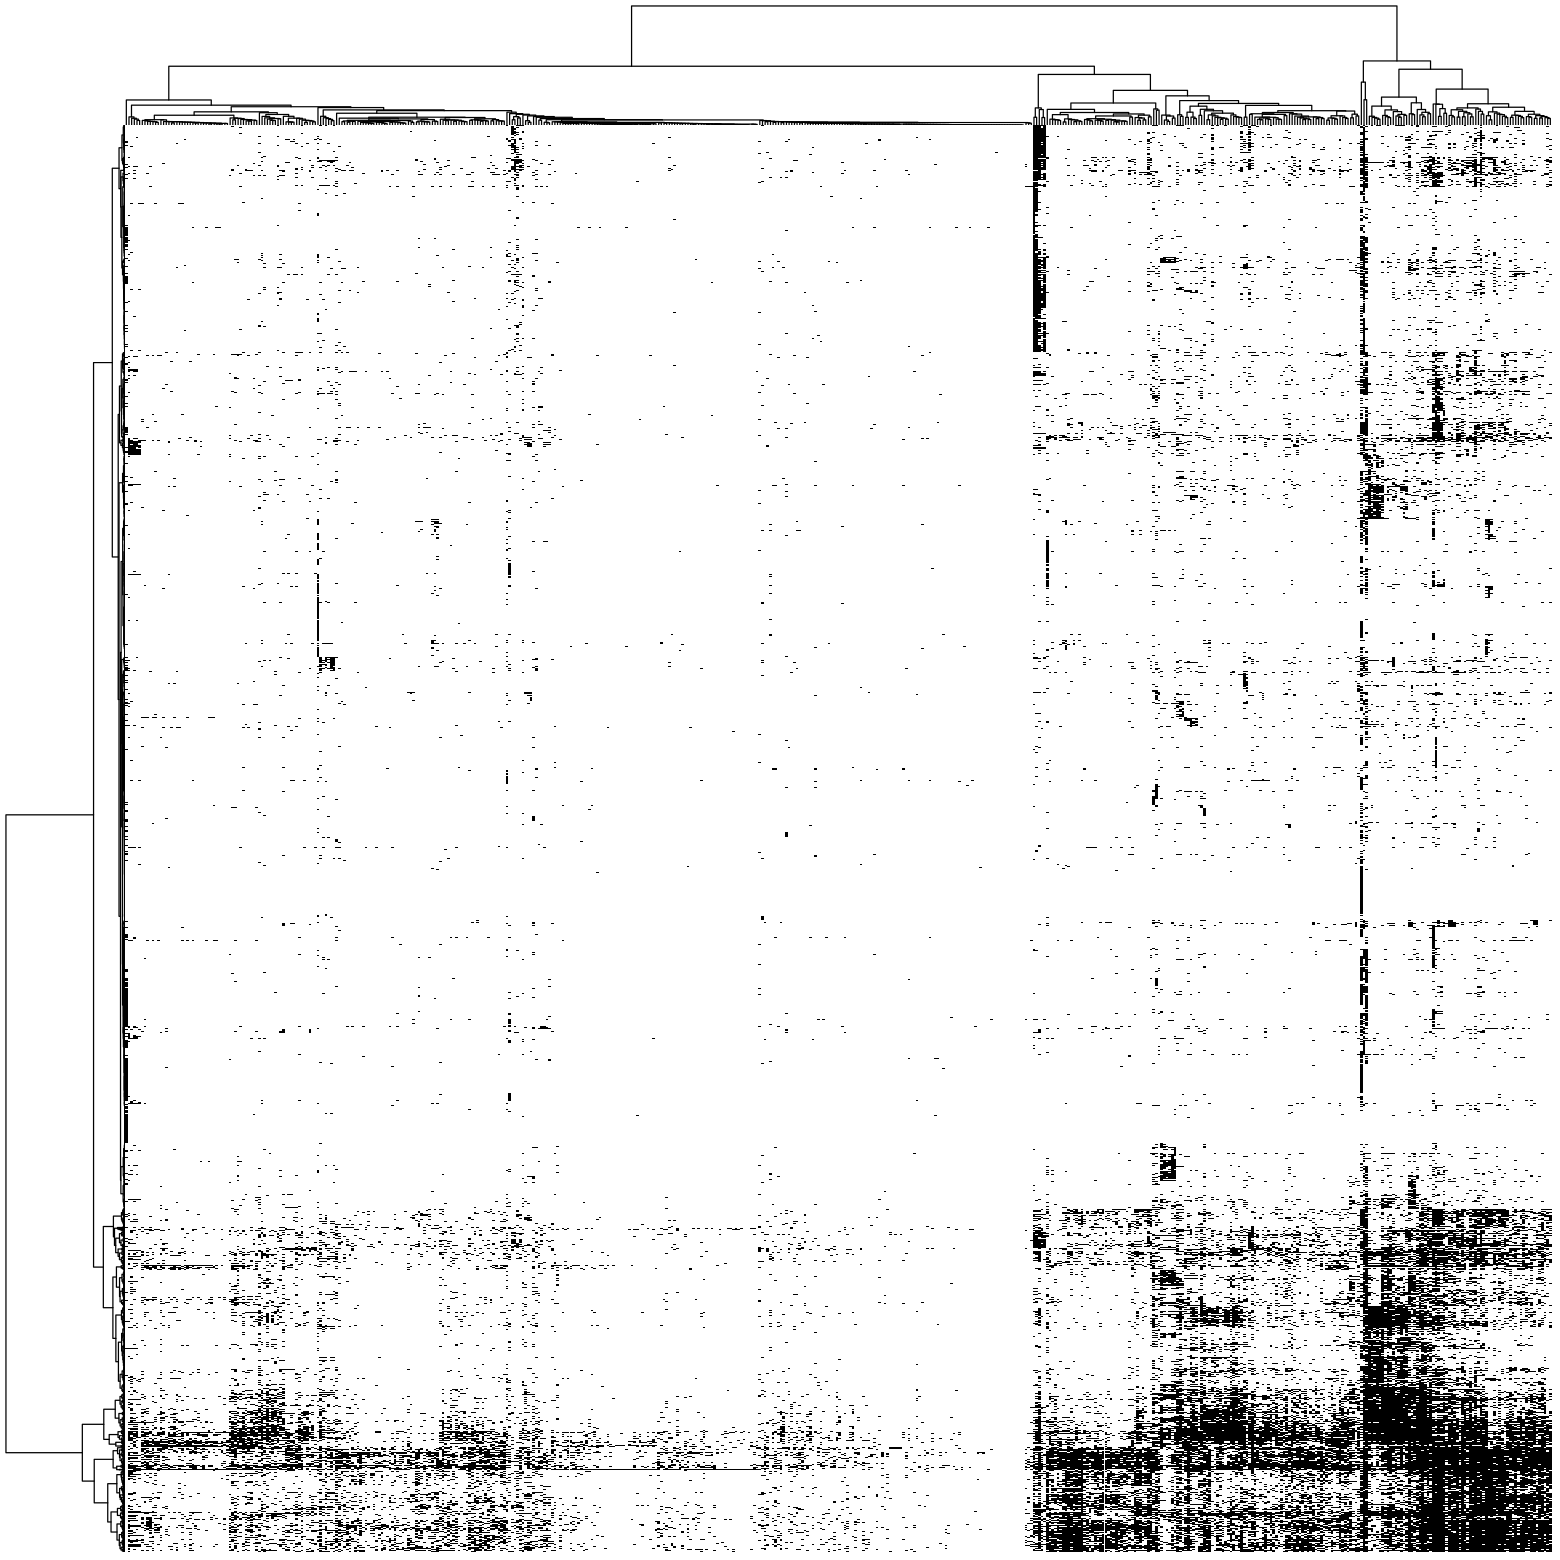

In [13]:
dat = dat_region_annot
mat = dat %>% column_to_rownames("Region")

options(repr.plot.height = 13, repr.plot.width=13)
pheatmap(
    mat,
    cluster_rows = res_hcl_row,
    cluster_cols = res_hcl_col,
    fontsize                 = 15,
    treeheight_row           = 70,
    treeheight_col           = 70,
    show_rownames            = FALSE,
    show_colnames            = FALSE,
    legend                   = FALSE,
    color = c("white", "black")
)

In [7]:
dim(mat)

[1] 144537    536

In [8]:
res = res_hcl_row
print(res)


Call:
fastcluster::hclust(d = mat, method = "ward.D2")

Cluster method   : ward.D2 
Distance         : manhattan 
Number of objects: 144537 



In [10]:
res = res_hcl_row
idx = cutree(res, 10)
table(idx)

idx
     1      2      3 
128504   5448  10585 

In [11]:
names(res)

[1] "merge"       "height"      "order"       "labels"      "method"     
[6] "call"        "dist.method"

In [12]:
head(res$labels)

[1] "chr1:10038-10405"   "chr1:16025-16338"   "chr1:17288-17689"  
[4] "chr1:28934-29499"   "chr1:115429-115969" "chr1:136201-137353"

In [15]:
length(res$height)

[1] 144536

In [16]:
summary(res$height)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    0.000     1.000     9.003    29.815    40.270 22048.173 

In [9]:
library(cluster)

In [ ]:
plot(silhouette(cutree(Data.hclust,3), distance))